In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("PSsample.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cols=['District','Event','Circle','Police_Station','Caller_Source','Event_Type','Event_Sub-Type',
      'Create Date/Time','Latitude','Longitude']
df.columns=cols

In [4]:
df=df.dropna()
df=df.reset_index(drop=True)
df.shape

(5123, 10)

In [4]:
df.isnull().sum()

District            0
Event               0
Circle              0
Police Station      0
Caller Source       0
Event Type          0
Event Sub-Type      0
Create Date/Time    0
Latitude            0
Longitude           0
dtype: int64

In [5]:
df.head()

,District,Event,Circle,Police Station,Caller Source,Event Type,Event Sub-Type,Create Date/Time,Latitude,Longitude
0,LUCKNOW,P01042100004,C1,PS1,PHONE,Information Against Police,Misbehavior By Prv,01/04/2021 00:00:00,26.834,81.008
1,LUCKNOW,P01042104316,C1,PS1,PHONE,Threat In Person,Attack,01/04/2021 12:09:00,26.828,81.014
2,LUCKNOW,P01042104847,C1,PS1,PHONE,Dispute,Dispute In Hospital,01/04/2021 12:51:00,26.840,81.009
3,LUCKNOW,P01042105074,C1,PS1,PHONE,Gambling,Play Cards,01/04/2021 13:10:00,26.828,81.002
4,LUCKNOW,P01042105152,C1,PS1,PHONE,Threat In Person,Attack,01/04/2021 13:18:00,26.834,81.033


In [6]:
df['Time'] = pd.to_datetime(df['Create Date/Time']).dt.time

In [7]:
df['Dates'] = pd.to_datetime(df['Create Date/Time'])

In [8]:
df['just_date'] = df['Dates'].dt.date

In [9]:
df['day_of_week'] = df['Dates'].dt.weekday_name

In [10]:
df['time_hour'] = pd.to_datetime(df['Create Date/Time']).dt.hour

In [11]:
def DayorNight(hrs):
    if hrs<18 and hrs>5:
        return 'Day'
    else:
        return 'Night'
df['Day/Night']=df['time_hour'].apply(lambda hrs: DayorNight(hrs))

In [12]:
df.head()

,District,Event,Circle,Police Station,Caller Source,Event Type,Event Sub-Type,Create Date/Time,Latitude,Longitude,Time,Dates,just_date,day_of_week,time_hour,Day/Night
0,LUCKNOW,P01042100004,C1,PS1,PHONE,Information Against Police,Misbehavior By Prv,01/04/2021 00:00:00,26.834,81.008,00:00:00,2021-01-04 00:00:00,2021-01-04,Monday,0,Night
1,LUCKNOW,P01042104316,C1,PS1,PHONE,Threat In Person,Attack,01/04/2021 12:09:00,26.828,81.014,12:09:00,2021-01-04 12:09:00,2021-01-04,Monday,12,Day
2,LUCKNOW,P01042104847,C1,PS1,PHONE,Dispute,Dispute In Hospital,01/04/2021 12:51:00,26.840,81.009,12:51:00,2021-01-04 12:51:00,2021-01-04,Monday,12,Day
3,LUCKNOW,P01042105074,C1,PS1,PHONE,Gambling,Play Cards,01/04/2021 13:10:00,26.828,81.002,13:10:00,2021-01-04 13:10:00,2021-01-04,Monday,13,Day
4,LUCKNOW,P01042105152,C1,PS1,PHONE,Threat In Person,Attack,01/04/2021 13:18:00,26.834,81.033,13:18:00,2021-01-04 13:18:00,2021-01-04,Monday,13,Day


In [14]:
df['Caller_Source'].nunique(),df['Caller_Source'].unique()

(8, array(['PHONE', 'TWITTER', 'WhatsApp', 'NERS112', 'CITZNAPP', 'EMRI108',
        '1090', 'SMS'], dtype=object))

In [14]:
df['Event_Type'].nunique(),df['Event_Type'].unique()

(54, array(['Information Against Police', 'Threat In Person', 'Dispute',
        'Gambling', 'Missing', 'Theft', 'Domestic Violence',
        'Property Disputes', 'Illegal Mining', 'Suicide', 'Corona',
        'Cyber Crimes', 'Female Sexual Harrassment',
        'Unclaimed Information', 'Encroachment',
        'Crime On Phone Mobile Social Media Internet', 'Animals Related',
        'Unknown', 'Robbery', 'Pollution',
        'Information Against Other Government Departments', 'Medium Fire',
        'Child Crime(Sexual Abuse)', 'Found Deadbody',
        'Suspicious Object Information',
        'Threat On Phone Email Social Media', 'Dacoity',
        'Attempted Murder', 'Suspicious Person Information', 'Forgery',
        'Female Harrassment', 'Kidnap', 'Excise Act Offenses', 'Accident',
        'Ndps Act Offenses', 'Police Help Required By 108',
        'Escort For Safety', 'Traffic Jam', 'Differently Abled People',
        'Sos', 'Murder', 'Assault/Riot/Commotion', 'Major Fire',
       

In [15]:
df['Event_Sub-Type'].nunique(),df['Event_Sub-Type'].unique()

(201, array(['Misbehavior By Prv', 'Attack', 'Dispute In Hospital',
        'Play Cards', 'Grp- Person Accident By Train ',
        'Misbehavior By Ps Incharge', 'Gold Shop',
        'Dispute With Drunk Person', 'Money Transactions Dispute',
        'Family Dispute With Sr. Citizen', 'Threatening To Kill',
        'House Capture',
        'No Action Has Been Taken By Ps Incharge For Delivery Of Person Vehicle Goods By ',
        'Boundary Dispute', 'Beat Children By Familymembers',
        'Other Dispute', 'Other Location', 'Two Wheeler Vehicle',
        'Illegal Mining Land', 'By Hanging', 'Residential Building',
        'Husband To Beat Wife', 'Suspect Found Infected',
        'Bank Account Hacking', 'Teasing On Public Place', 'Unclaimed Men',
        'Expellinghouse Wife By Husband Or Family Members From House',
        'Government Land', 'Abuse Men', 'Sewer Dispute',
        'Found Injured Animal', 'Unknown', 'Women',
        'Cow Carcass And Slaughtering', 'On Road', 'Help For Oth

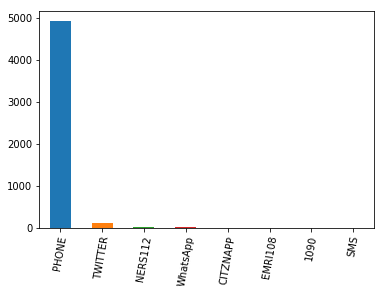

In [16]:
df['Caller_Source'].value_counts().plot.bar(rot=80)

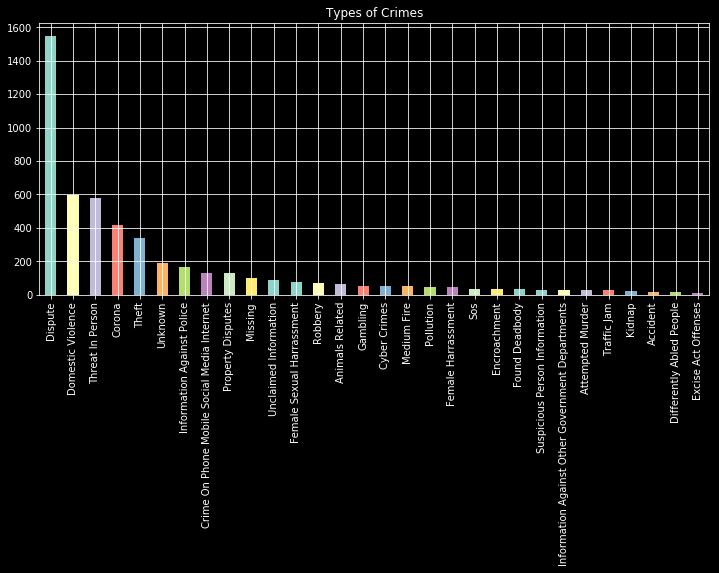

In [25]:
df['Event_Type'].value_counts().iloc[:30].plot.bar( title = "Types of Crimes",figsize=(12, 5))
plt.grid('True')
plt.show()

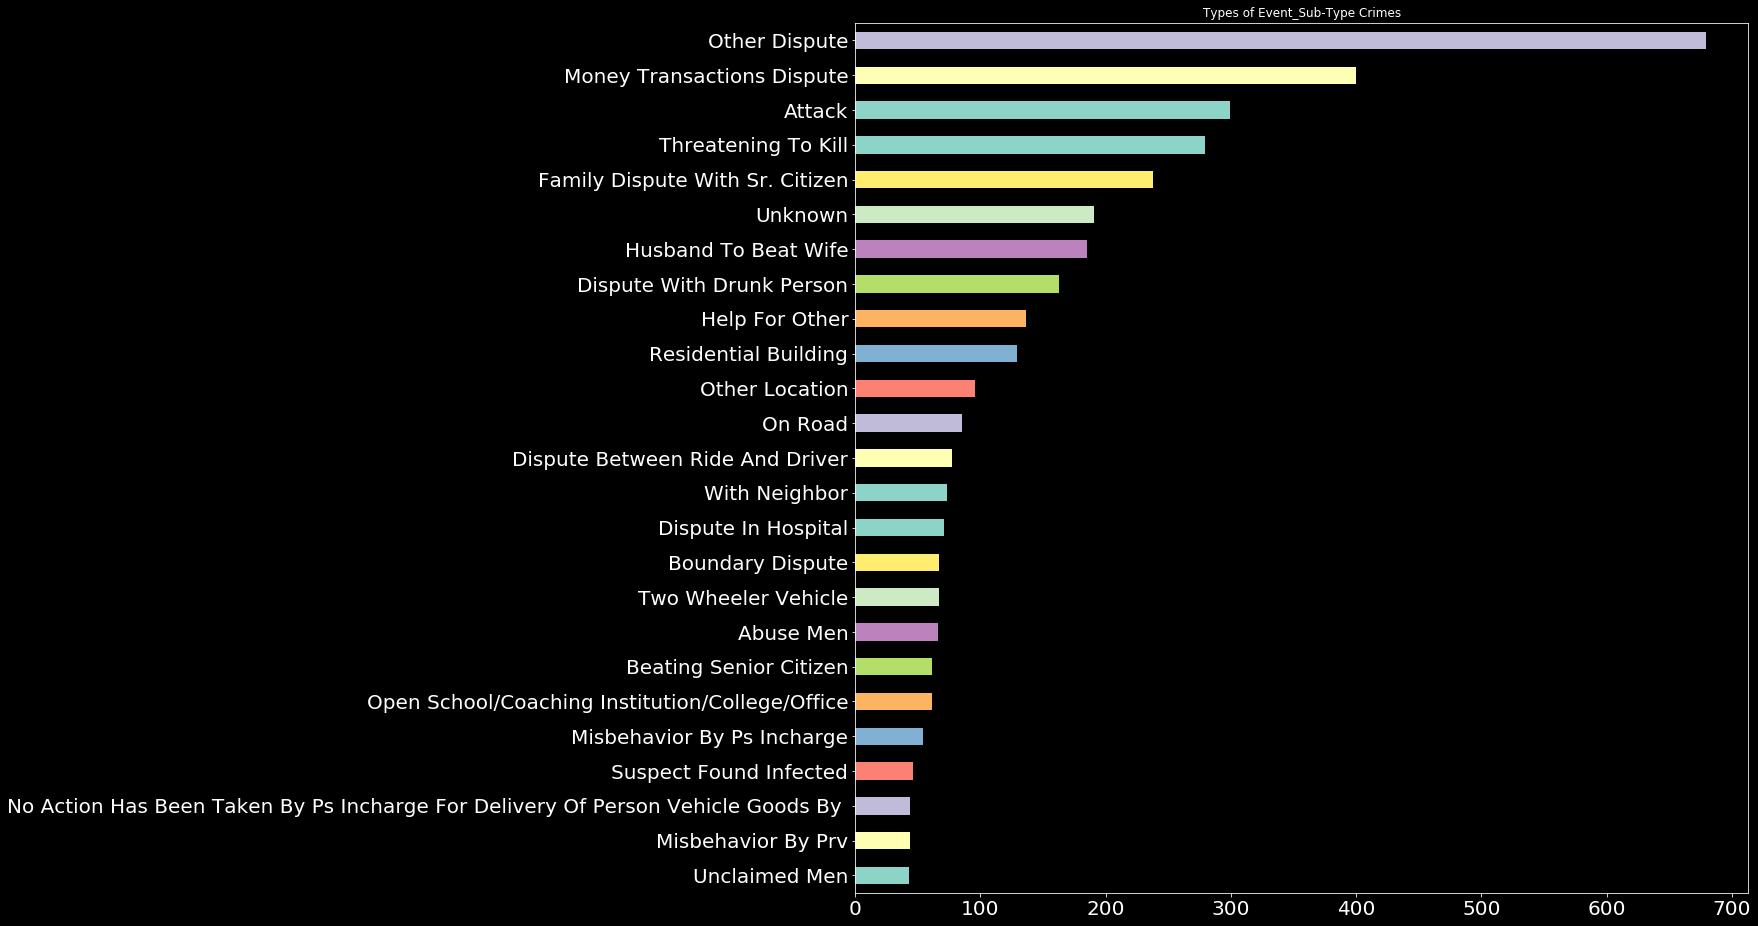

In [29]:
df['Event_Sub-Type'].value_counts().iloc[:25].sort_values().plot(kind="barh", title = "Types of Event_Sub-Type Crimes",figsize=(16, 16),fontsize = 20)

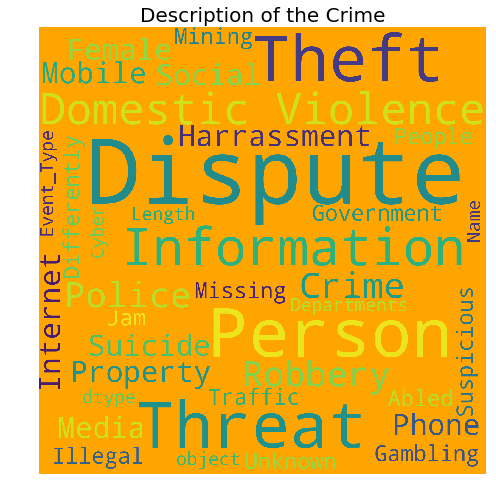

In [21]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (8, 12)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(df['Event_Type']))
plt.title('Description of the Crime', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

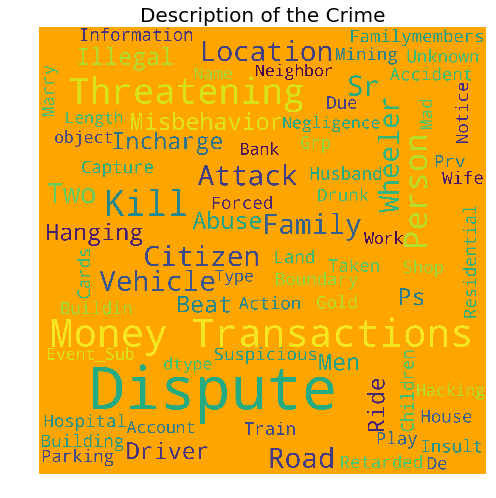

In [22]:
plt.rcParams['figure.figsize'] = (8, 12)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(df['Event_Sub-Type']))
plt.title('Description of the Crime', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

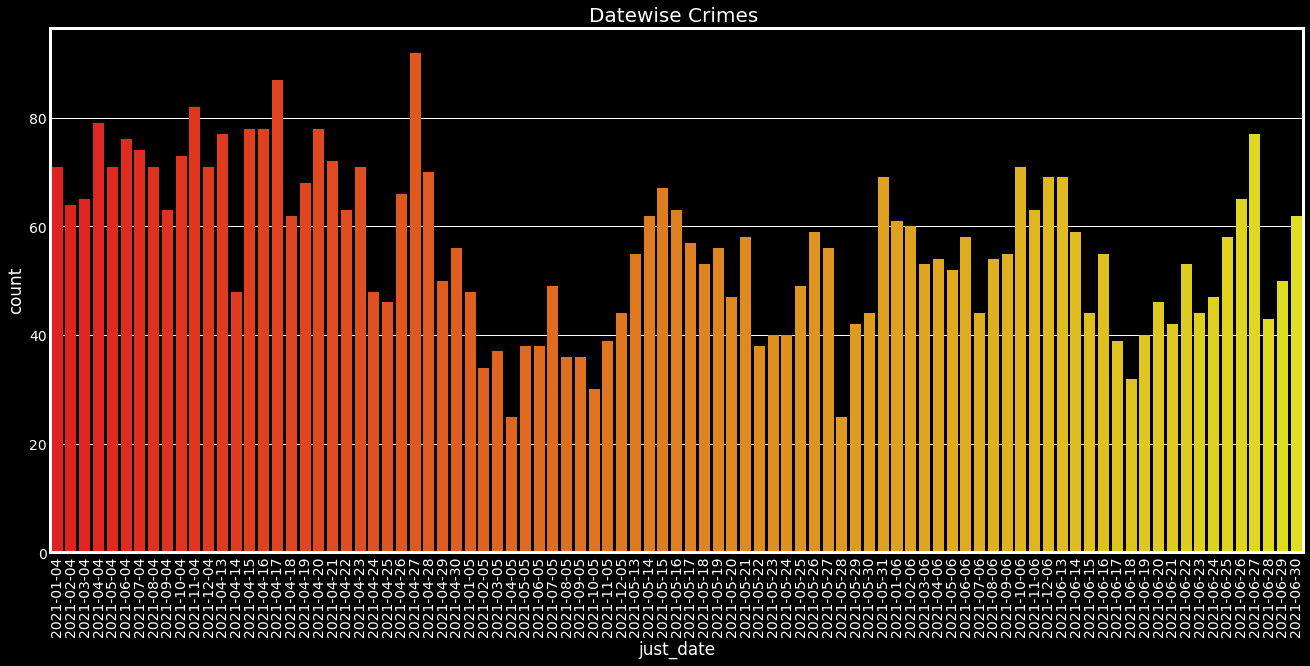

In [19]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(df['just_date'], palette = 'autumn',)

plt.title('Datewise Crimes ', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

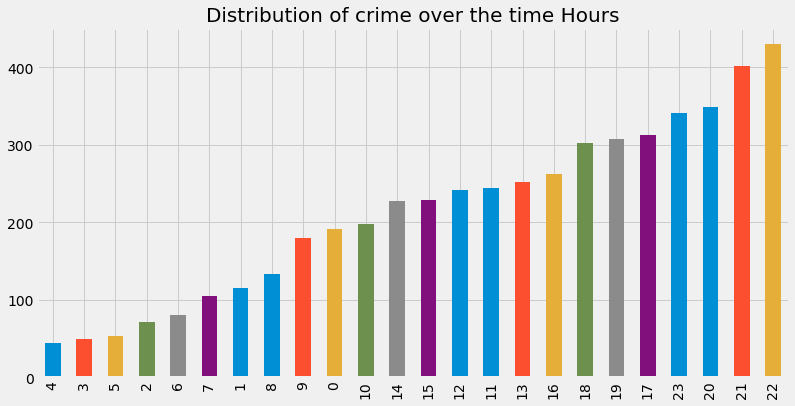

In [21]:
df['time_hour'].value_counts().sort_values().plot.bar( figsize = (12, 6))
plt.title('Distribution of crime over the time Hours', fontsize = 20)
plt.show()

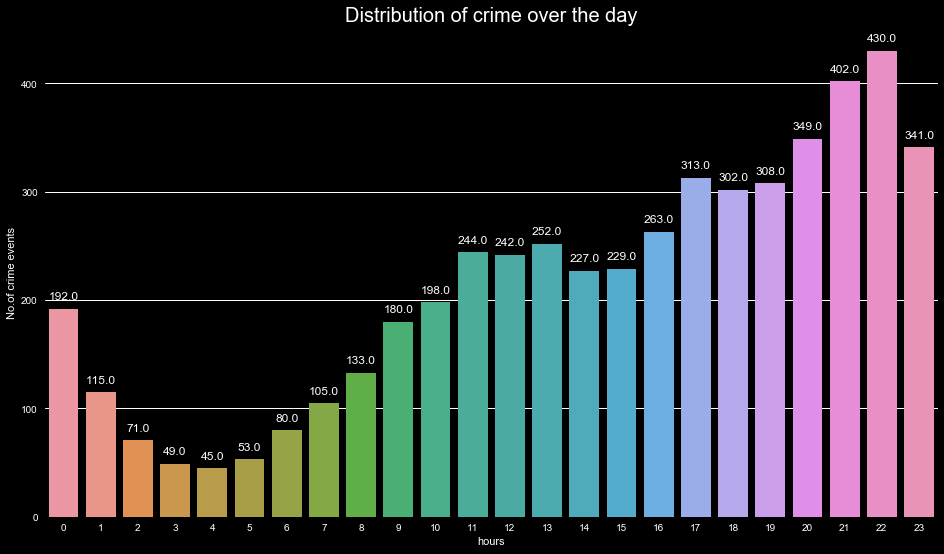

In [17]:
sns.set()
plt.style.use('dark_background')
plt.figure(figsize=(16,9))
splot=sns.countplot( x='time_hour', data=df ) 

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 12), 
                   textcoords = 'offset points')

plt.title('Distribution of crime over the day', fontsize = 20)
plt.xlabel("hours")
plt.ylabel("No.of crime events")
plt.show()


In [27]:
df['day_of_week'].value_counts()

Monday       786
Tuesday      743
Sunday       738
Saturday     735
Thursday     734
Wednesday    707
Friday       680
Name: day_of_week, dtype: int64

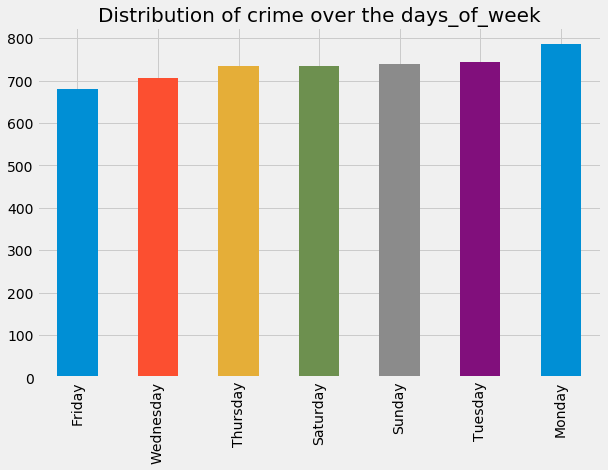

In [24]:
df['day_of_week'].value_counts().sort_values(ascending=True).plot.bar( figsize = (9, 6))
plt.title('Distribution of crime over the days_of_week', fontsize = 20)
plt.show()

In [30]:
df['Day/Night'].value_counts()

Night    2657
Day      2466
Name: Day/Night, dtype: int64

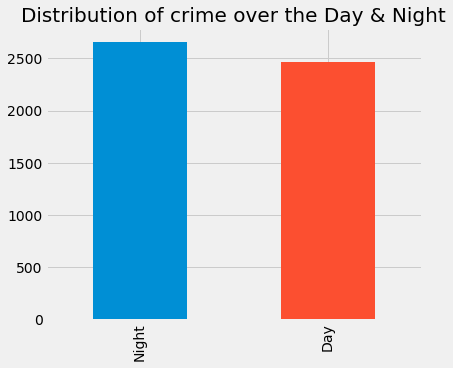

In [26]:

df['Day/Night'].value_counts().plot.bar( figsize = (6, 5))
plt.title('Distribution of crime over the Day & Night', fontsize = 20)
plt.show()

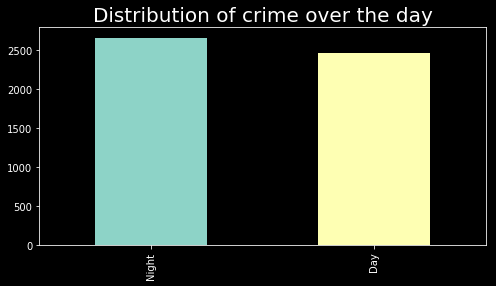

In [33]:

df['Day/Night'].value_counts().head(20).plot.bar( figsize = (8, 4))

plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

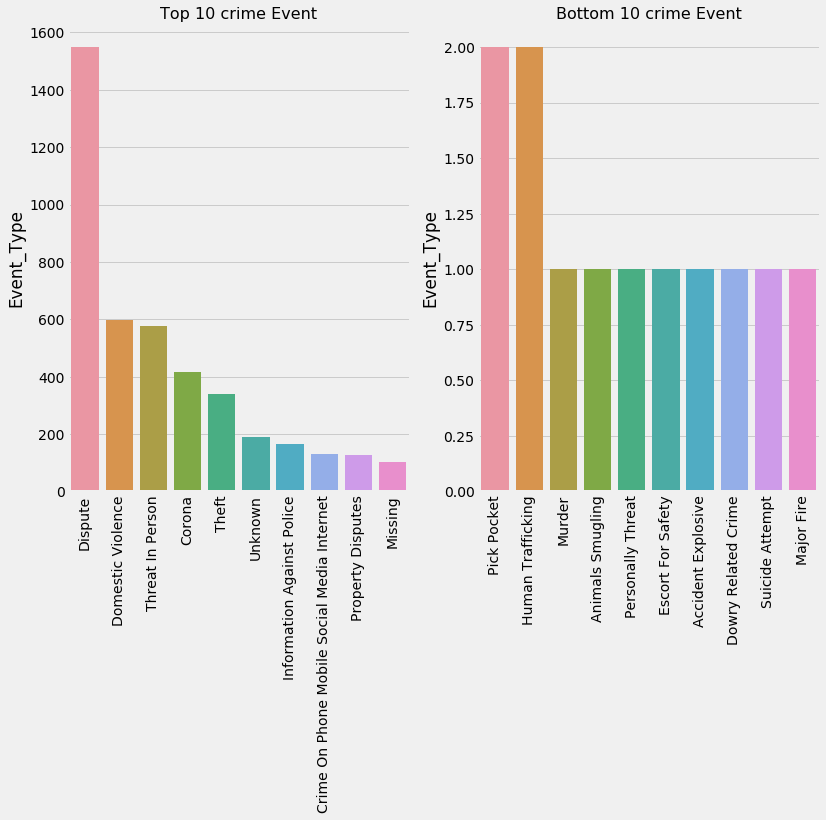

In [27]:
file_=pd.DataFrame(file_['Event_Type'].value_counts())
file_.tail()
plt.figure(figsize=(12,8))
ax1 =  plt.subplot2grid((1,2),(0,0))
ax1.set_title('Top 10 crime Event', size=16)
sns.barplot(x=file_.head(10).index, y='Event_Type', data=file_.head(10))
ax1.set_xticklabels(ax1.xaxis.get_ticklabels(), rotation=90)
ax2 =  plt.subplot2grid((1,2),(0,1))
ax2.set_title('Bottom 10 crime Event', size=16)
sns.barplot(x=file_.tail(10).index, y='Event_Type', data=file_.tail(10))
ax2.set_xticklabels(ax2.xaxis.get_ticklabels(), rotation=90)
plt.show()

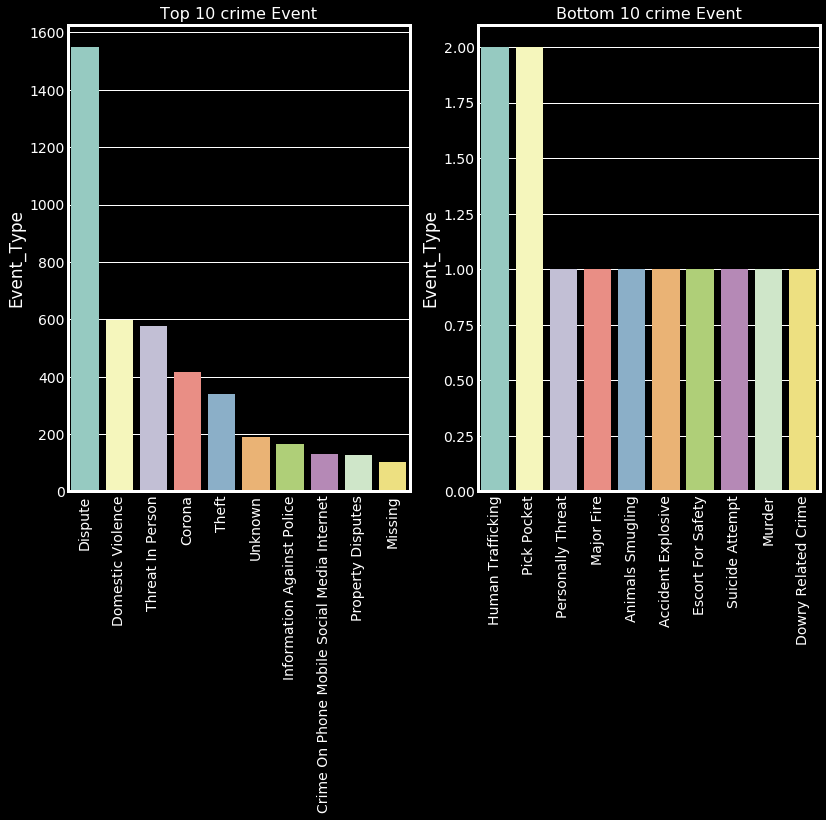

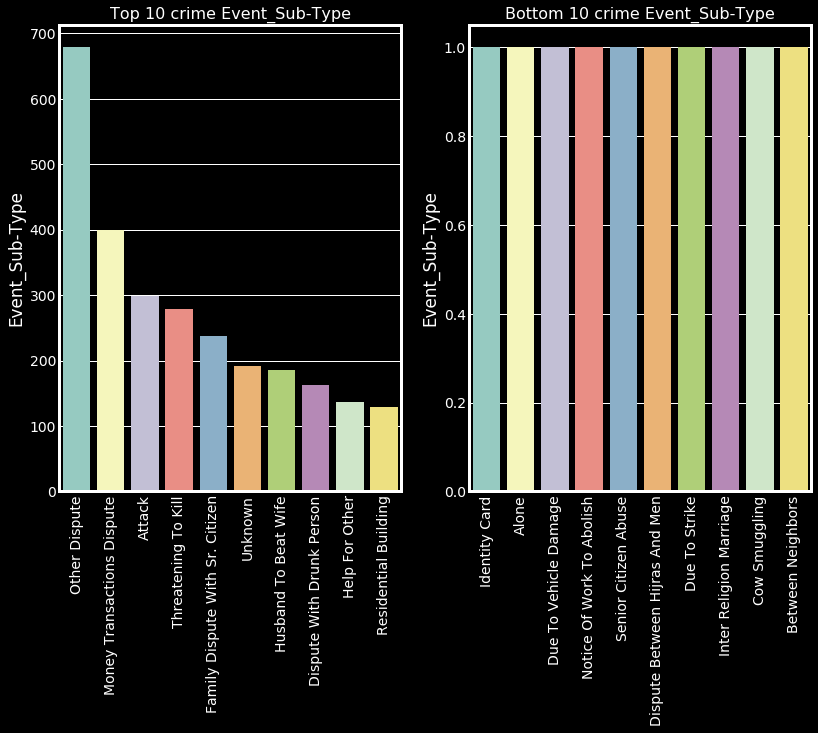

In [27]:
plt.style.use('dark_background')
file_=pd.DataFrame(df['Event_Type'].value_counts())
file_.tail()
plt.figure(figsize=(12,8))
ax1 =  plt.subplot2grid((1,2),(0,0))
ax1.set_title('Top 10 crime Event', size=16)
sns.barplot(x=file_.head(10).index, y='Event_Type', data=file_.head(10))
ax1.set_xticklabels(ax1.xaxis.get_ticklabels(), rotation=90)
ax2 =  plt.subplot2grid((1,2),(0,1))
ax2.set_title('Bottom 10 crime Event', size=16)
sns.barplot(x=file_.tail(10).index, y='Event_Type', data=file_.tail(10))
ax2.set_xticklabels(ax2.xaxis.get_ticklabels(), rotation=90)
plt.show()



dg=pd.DataFrame(df['Event_Sub-Type'].value_counts())
dg.tail()
plt.figure(figsize=(12,8))
ax3 =  plt.subplot2grid((1,2),(0,0))
ax3.set_title('Top 10 crime Event_Sub-Type', size=16)
sns.barplot(x=dg.head(10).index, y='Event_Sub-Type', data=dg.head(10))
ax3.set_xticklabels(ax3.xaxis.get_ticklabels(), rotation=90)
ax4 =  plt.subplot2grid((1,2),(0,1))
ax4.set_title('Bottom 10 crime Event_Sub-Type', size=16)
sns.barplot(x=dg.tail(10).index, y='Event_Sub-Type', data=dg.tail(10))
ax4.set_xticklabels(ax4.xaxis.get_ticklabels(), rotation=90)
plt.show()

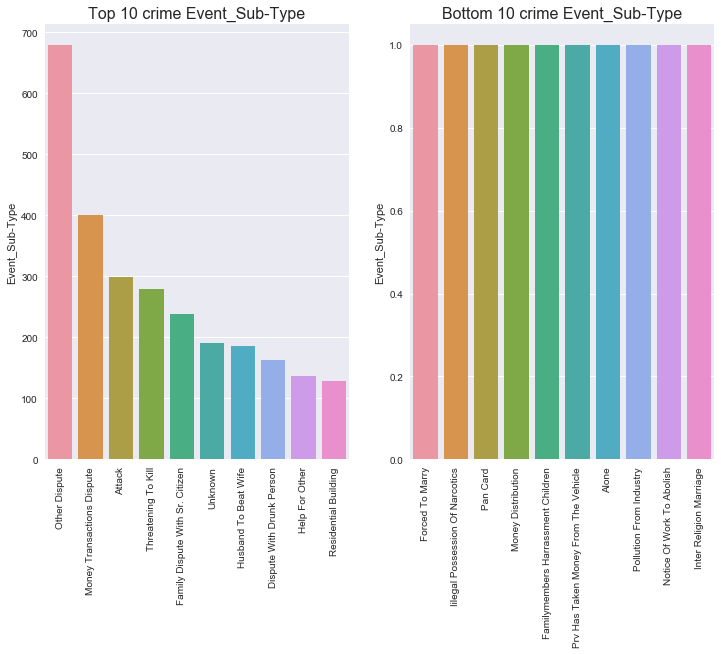

In [76]:
file=pd.DataFrame(df['Event_Sub-Type'].value_counts())
file.tail()
plt.figure(figsize=(12,8))
ax1 =  plt.subplot2grid((1,2),(0,0))
ax1.set_title('Top 10 crime Event_Sub-Type', size=16)
sns.barplot(x=file.head(10).index, y='Event_Sub-Type', data=file.head(10))
ax1.set_xticklabels(ax1.xaxis.get_ticklabels(), rotation=90)
ax2 =  plt.subplot2grid((1,2),(0,1))
ax2.set_title('Bottom 10 crime Event_Sub-Type', size=16)
sns.barplot(x=file.tail(10).index, y='Event_Sub-Type', data=file.tail(10))
ax2.set_xticklabels(ax2.xaxis.get_ticklabels(), rotation=90)
plt.show()

In [19]:
pd.crosstab([df.Event_Type],[df.time_hour],margins=True)

time_hour,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,All
Event_Type,,,,,,,,,,,,,,,,,,,,,
Accident,1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,2,4,4,0,2,17
Accident Explosive,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
Animals Related,2,1,1,0,0,1,4,3,2,1,...,3,1,4,4,5,1,2,5,8,62
Animals Smugling,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
Assault/Riot/Commotion,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,3,1,5
Attempted Murder,3,1,1,0,1,0,0,0,1,0,...,0,0,0,1,1,0,4,9,2,26
Child Crime,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,1,0,7
Child Crime(Sexual Abuse),0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,7
Corona,12,10,4,6,6,6,12,8,10,18,...,16,16,28,38,37,24,27,19,11,415


In [ ]:
for y in :
    ct = pd.crosstab(df[df.Event_Type == 'Dispute'].Category, df[df.Event_Type == 'Dispute'].IsDay)               #### Cal Day Crime Or Night
    ct.plot(kind='barh', figsize=(14,14), title=f'Crime Categories by Day/Night ({y})')
    plt.show()


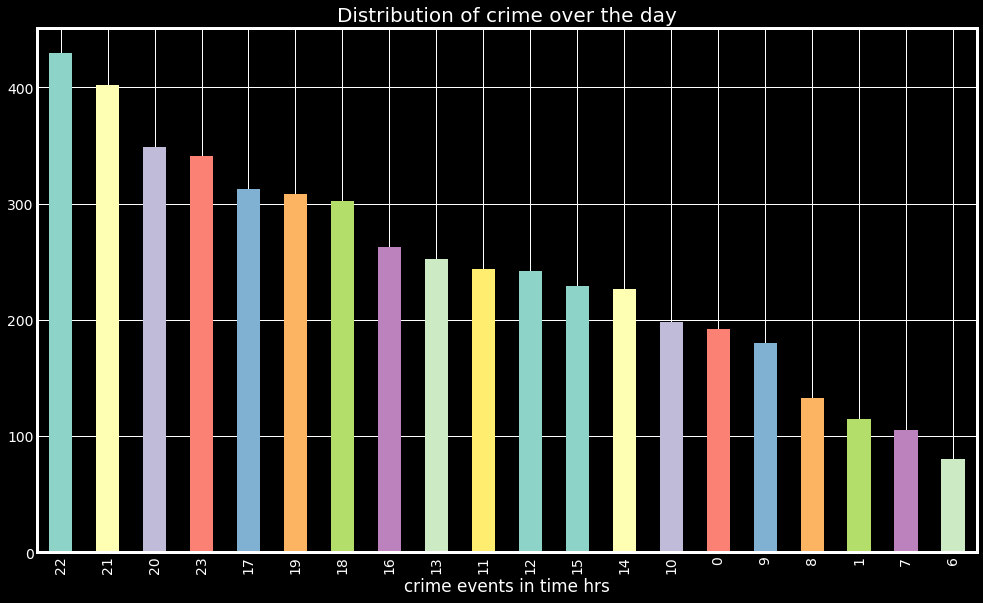

In [30]:

df['time_hour'].value_counts().head(20).plot.bar( figsize = (15, 9))

plt.title('Distribution of crime over the day', fontsize = 20)
plt.xlabel("crime events in time hrs")
plt.show()

In [27]:
df

,District,Event,Circle,Police_Station,Caller_Source,Event_Type,Event_Sub-Type,Create Date/Time,Latitude,Longitude,Time,Dates,just_date,day_of_week,time_hour,Day/Night
0,LUCKNOW,P01042100004,C1,PS1,PHONE,Information Against Police,Misbehavior By Prv,01/04/2021 00:00:00,26.834,81.008,00:00:00,2021-01-04 00:00:00,2021-01-04,Monday,0,Night
1,LUCKNOW,P01042104316,C1,PS1,PHONE,Threat In Person,Attack,01/04/2021 12:09:00,26.828,81.014,12:09:00,2021-01-04 12:09:00,2021-01-04,Monday,12,Day
2,LUCKNOW,P01042104847,C1,PS1,PHONE,Dispute,Dispute In Hospital,01/04/2021 12:51:00,26.840,81.009,12:51:00,2021-01-04 12:51:00,2021-01-04,Monday,12,Day
3,LUCKNOW,P01042105074,C1,PS1,PHONE,Gambling,Play Cards,01/04/2021 13:10:00,26.828,81.002,13:10:00,2021-01-04 13:10:00,2021-01-04,Monday,13,Day
4,LUCKNOW,P01042105152,C1,PS1,PHONE,Threat In Person,Attack,01/04/2021 13:18:00,26.834,81.033,13:18:00,2021-01-04 13:18:00,2021-01-04,Monday,13,Day
5,LUCKNOW,P01042105910,C1,PS1,PHONE,Missing,Grp- Person Accident By Train,01/04/2021 14:19:00,26.826,81.011,14:19:00,2021-01-04 14:19:00,2021-01-04,Monday,14,Day
6,LUCKNOW,P01042106298,C1,PS1,PHONE,Information Against Police,Misbehavior By Ps Incharge,01/04/2021 14:51:00,26.835,81.008,14:51:00,2021-01-04 14:51:00,2021-01-04,Monday,14,Day
7,LUCKNOW,P01042106686,C1,PS1,PHONE,Theft,Gold Shop,01/04/2021 15:25:00,26.839,81.026,15:25:00,2021-01-04 15:25:00,2021-01-04,Monday,15,Day
8,LUCKNOW,P01042109479,C1,PS1,PHONE,Dispute,Dispute With Drunk Person,01/04/2021 19:45:00,26.835,81.026,19:45:00,2021-01-04 19:45:00,2021-01-04,Monday,19,Night
9,LUCKNOW,P01042110068,C1,PS1,PHONE,Dispute,Money Transactions Dispute,01/04/2021 20:31:00,26.841,81.015,20:31:00,2021-01-04 20:31:00,2021-01-04,Monday,20,Night


Text(0,0.5,'no. of crime events')

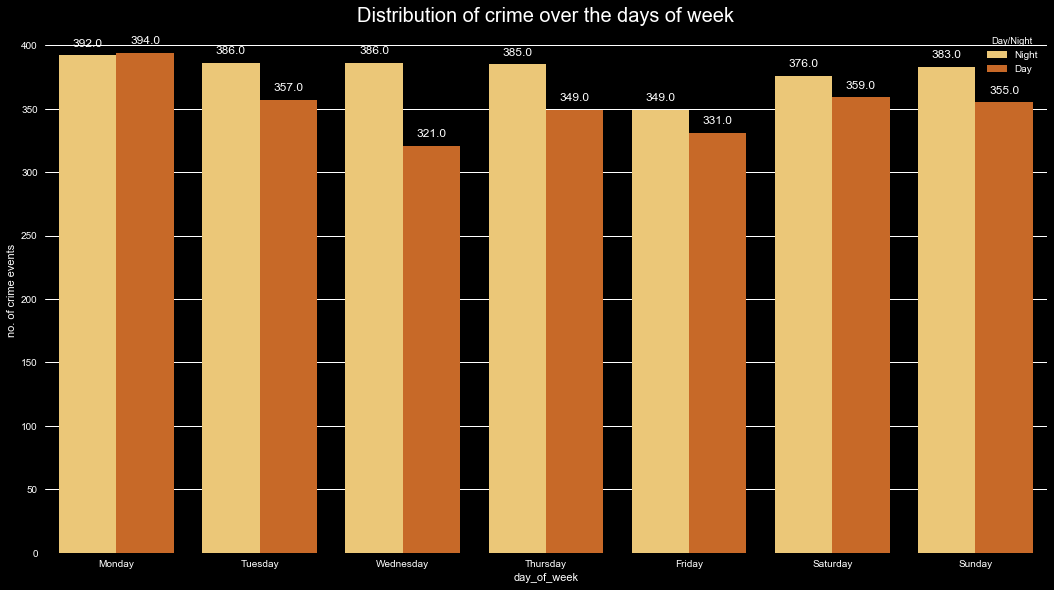

In [61]:


sns.set()
plt.style.use('dark_background')
plt.figure(figsize=(16,9))
splot=sns.countplot(x='day_of_week',hue='Day/Night', data=df , palette = "YlOrBr", 
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 12), 
                   textcoords = 'offset points')


plt.title('Distribution of crime over the days of week', fontsize = 20)
plt.ylabel("no. of crime events")

Text(0,0.5,'crime events')

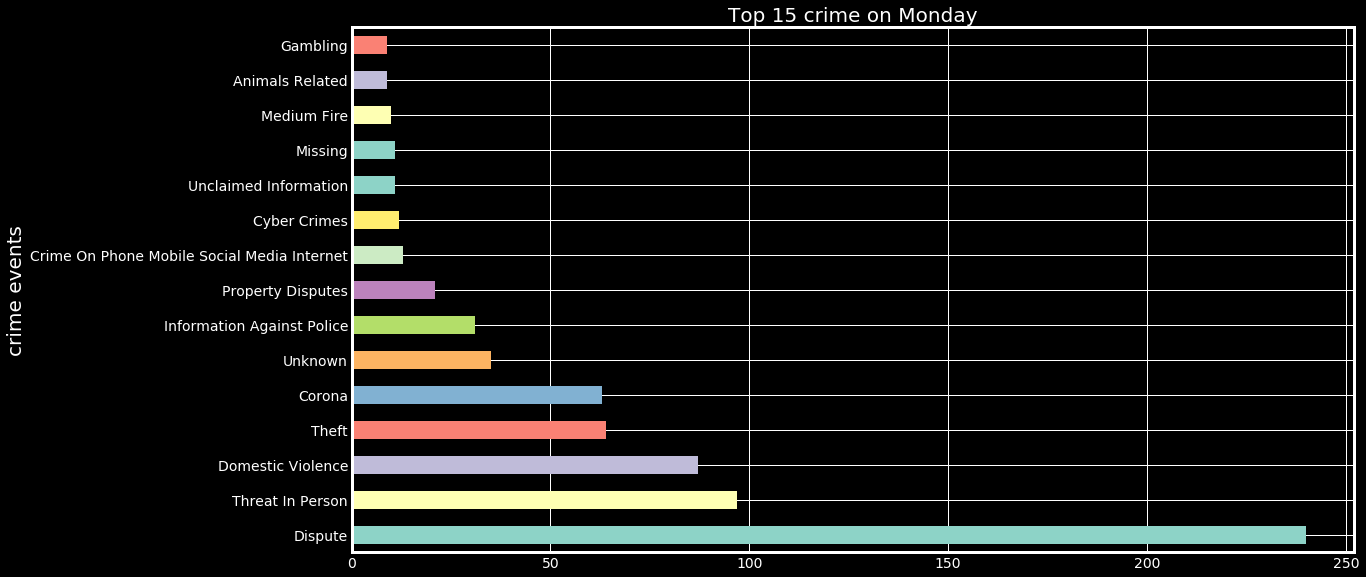

In [28]:
df['Event_Type'][(df.day_of_week=='Monday')].value_counts().iloc[:15].plot(kind='barh',figsize=(16, 9))
plt.style.use('dark_background')
plt.title('Top 15 crime on Monday', fontsize = 20)
plt.ylabel("crime events",fontsize = 20)

Text(0,0.5,'crime events')

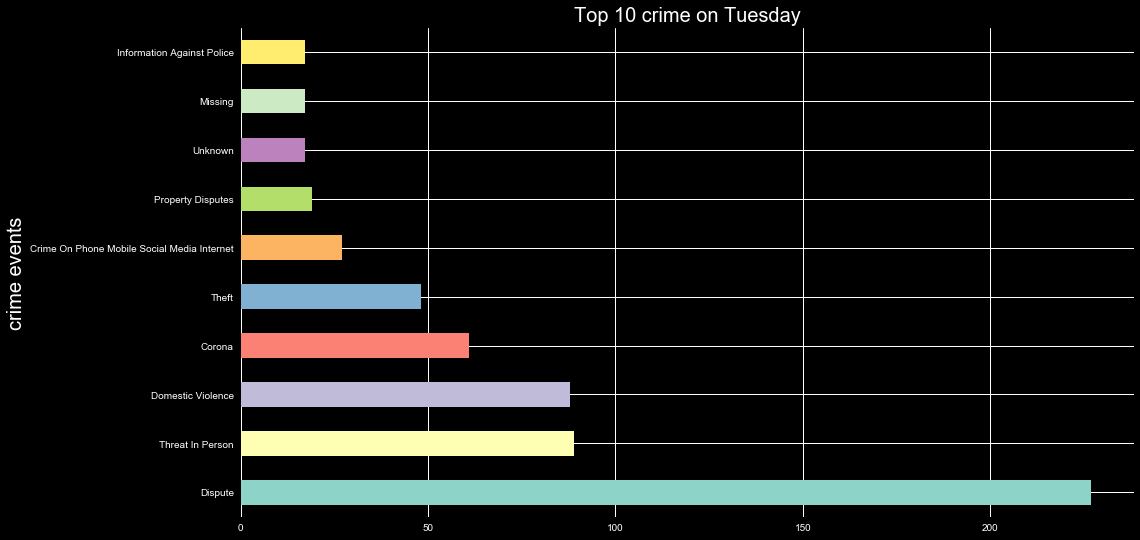

In [103]:
df['Event_Type'][(df.day_of_week=='Tuesday')].value_counts().iloc[:15].plot(kind='barh',figsize=(16, 9))
plt.style.use('dark_background')
plt.title('Top 15 crime on Tuesday', fontsize = 20)
plt.ylabel("crime events",fontsize = 20)

Text(0,0.5,'crime events')

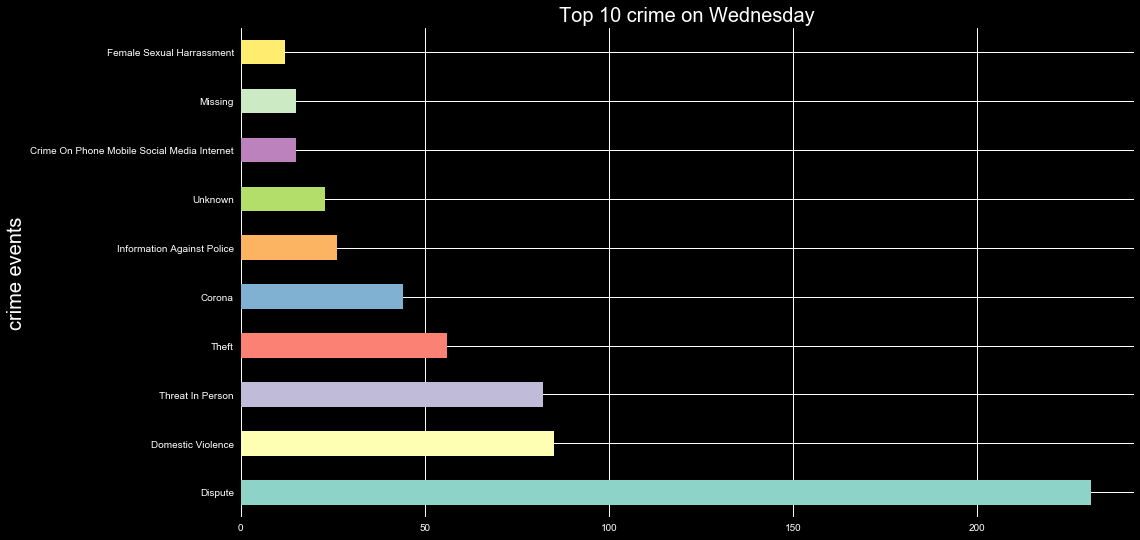

In [125]:
df['Event_Type'][(df.day_of_week=='Wednesday')].value_counts().iloc[:15].plot(kind='barh',figsize=(16, 9))
plt.style.use('dark_background')
plt.title('Top 15 crime on Wednesday', fontsize = 20)
plt.ylabel("crime events",fontsize = 20)

Text(0,0.5,'crime events')

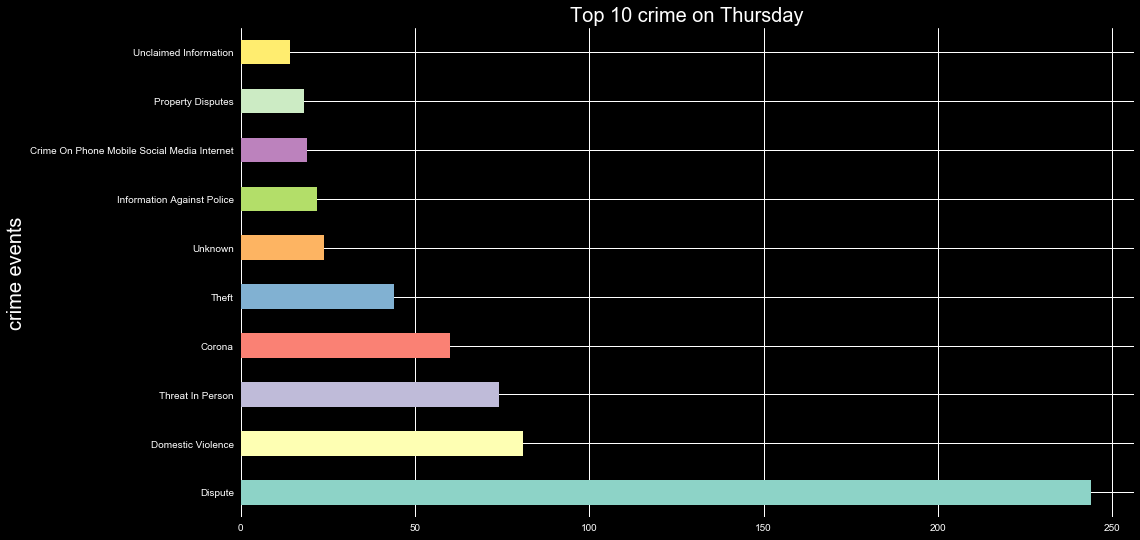

In [126]:
df['Event_Type'][(df.day_of_week=='Thursday')].value_counts().iloc[:15].plot(kind='barh',figsize=(16, 9))
plt.style.use('dark_background')
plt.title('Top 15 crime on Thursday', fontsize = 20)
plt.ylabel("crime events",fontsize = 20)

Text(0,0.5,'crime events')

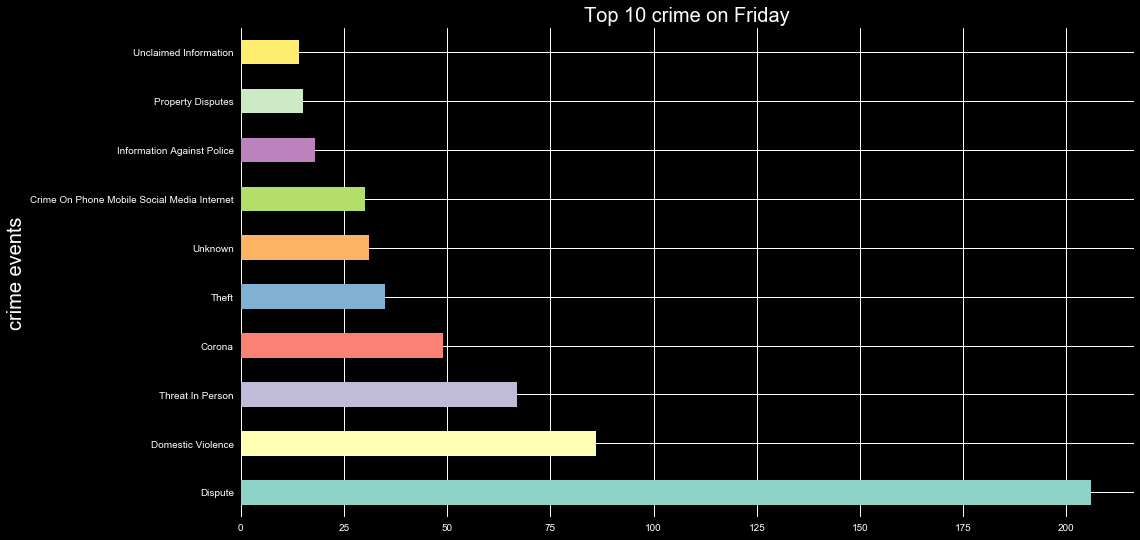

In [127]:
df['Event_Type'][(df.day_of_week=='Friday')].value_counts().iloc[:10].plot(kind='barh',figsize=(16, 9))
plt.style.use('dark_background')
plt.title('Top 15 crime on Friday', fontsize = 20)
plt.ylabel("crime events",fontsize = 20)

Text(0,0.5,'crime events')

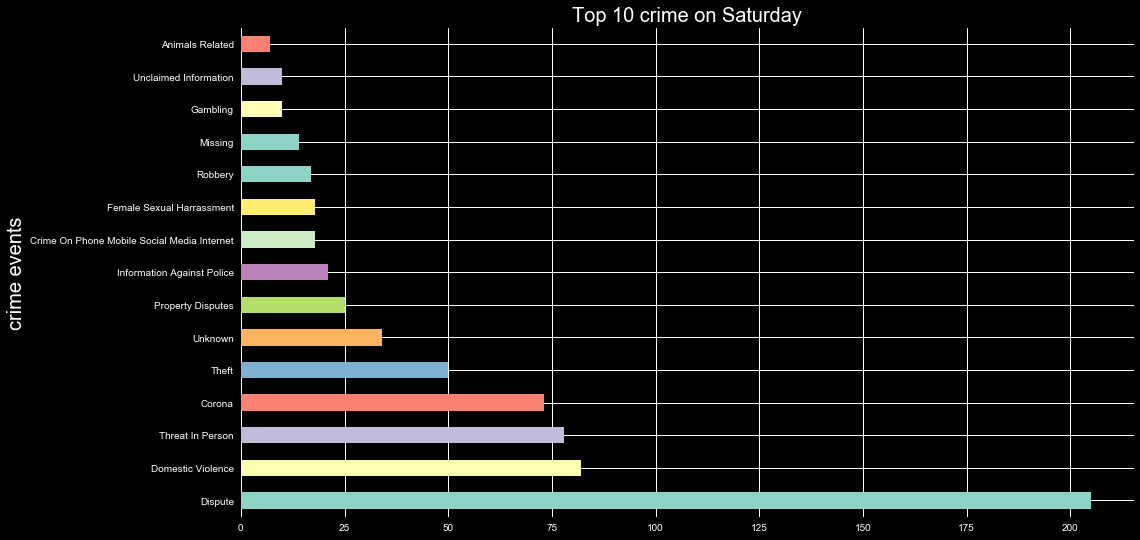

In [131]:
df['Event_Type'][(df.day_of_week=='Saturday')].value_counts().iloc[:15].plot(kind='barh',figsize=(16, 9))
plt.style.use('dark_background')
plt.title('Top 15 crime on Saturday', fontsize = 20)
plt.ylabel("crime events",fontsize = 20)

Text(0,0.5,'crime events')

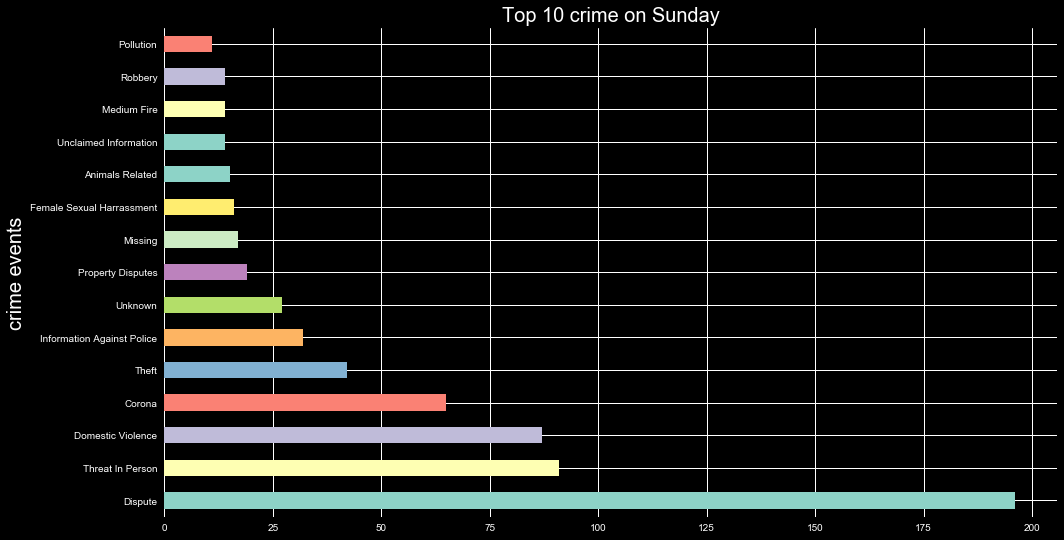

In [130]:
df['Event_Type'][(df.day_of_week=='Sunday')].value_counts().iloc[:15].plot(kind='barh',figsize=(16, 9))
plt.style.use('dark_background')
plt.title('Top 15 crime on Sunday', fontsize = 20)
plt.ylabel("crime events",fontsize = 20)

In [118]:
df['Event_Sub-Type'][(df['Event_Sub-Type'=='Tuesday') | (df.time_hour== ) ].nunique()

39

Text(0,0.5,'no. of crime events')

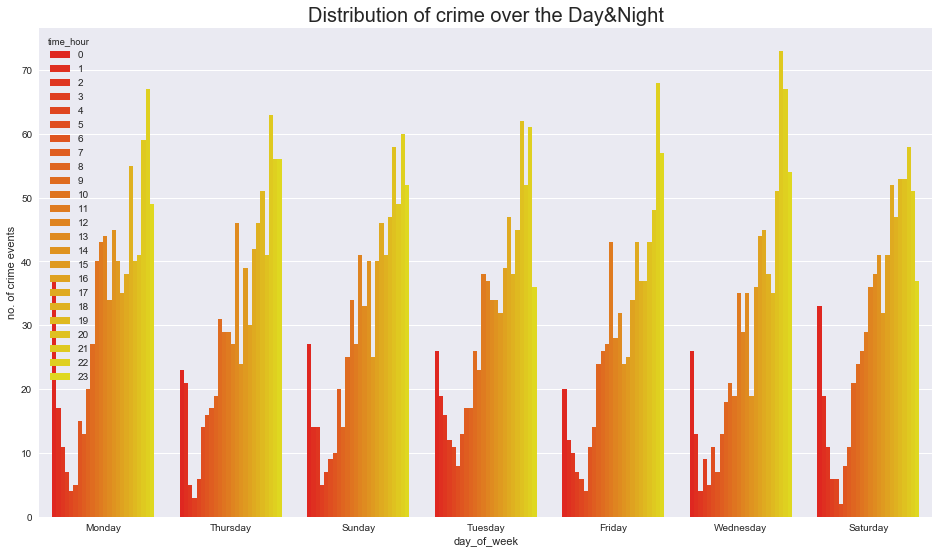

In [31]:
sns.set()

plt.figure(figsize=(16,9))
sns.countplot(x='day_of_week',hue='time_hour', data=df , palette = 'autumn',)
plt.title('Distribution of crime over the Day&Night', fontsize = 20)
plt.ylabel("no. of crime events")

In [ ]:
file=pd.DataFrame(df['Event_Sub-Type'].value_counts())
plt.figure(figsize=(12,8))


sns.barplot(x=file.head(10).index, y='Event_Sub-Type', data=file.head(10))
ax1.set_xticklabels(ax1.xaxis.get_ticklabels(), rotation=90)

plt.title('Top 10 crime Event_Type, fontsize = 20)
plt.ylabel("no. of crime events")

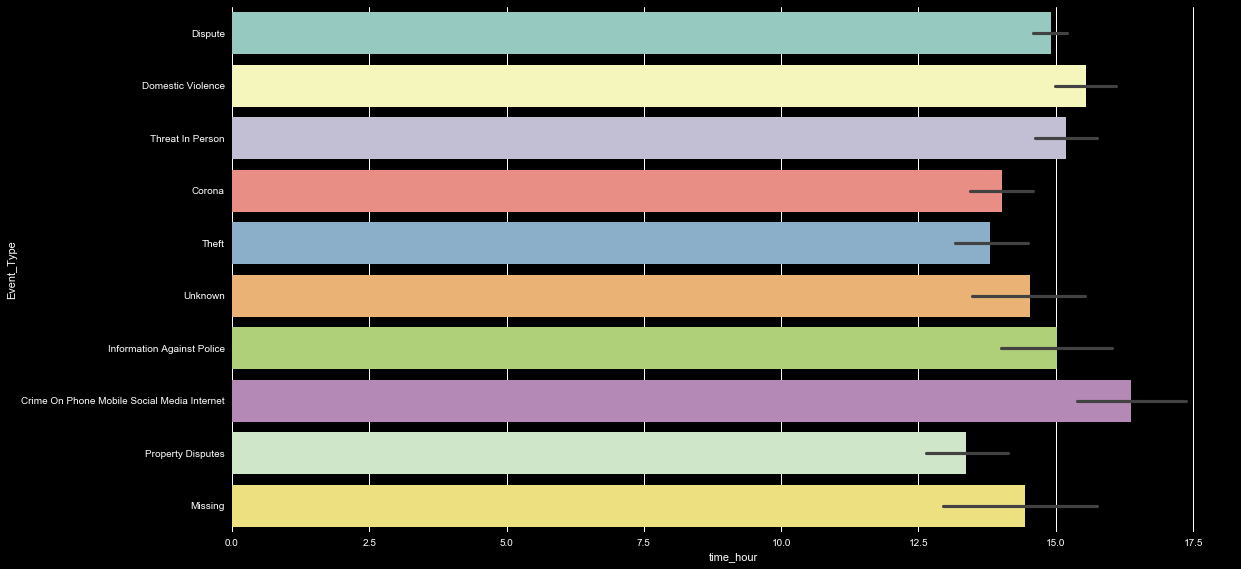

In [94]:

plt.figure(figsize=(16,9))

sp=sns.barplot(x = 'time_hour',
            y ='Event_Type',
            data = df,order=df.Event_Type.value_counts().iloc[:10].index)


# Show the plot
plt.show()

Text(0,0.5,'no. of crime events')

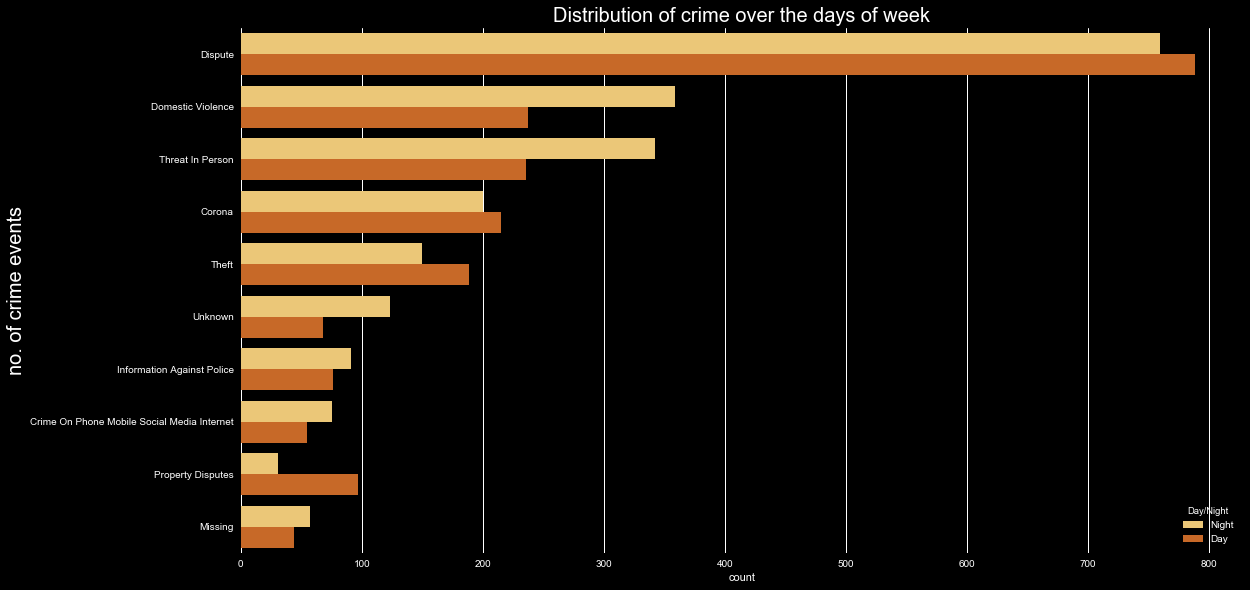

In [84]:

sns.set()
plt.style.use('dark_background')
plt.figure(figsize=(16,9))
sns.countplot( y='Event_Type',hue='Day/Night', data=df , palette = "YlOrBr",
              order=df.Event_Type.value_counts().iloc[:10].index) 
 
              

plt.title('Distribution of crime over the days of week', fontsize = 20)
plt.ylabel("no. of crime events",fontsize = 20)

Text(0,0.5,'no. of crime events')

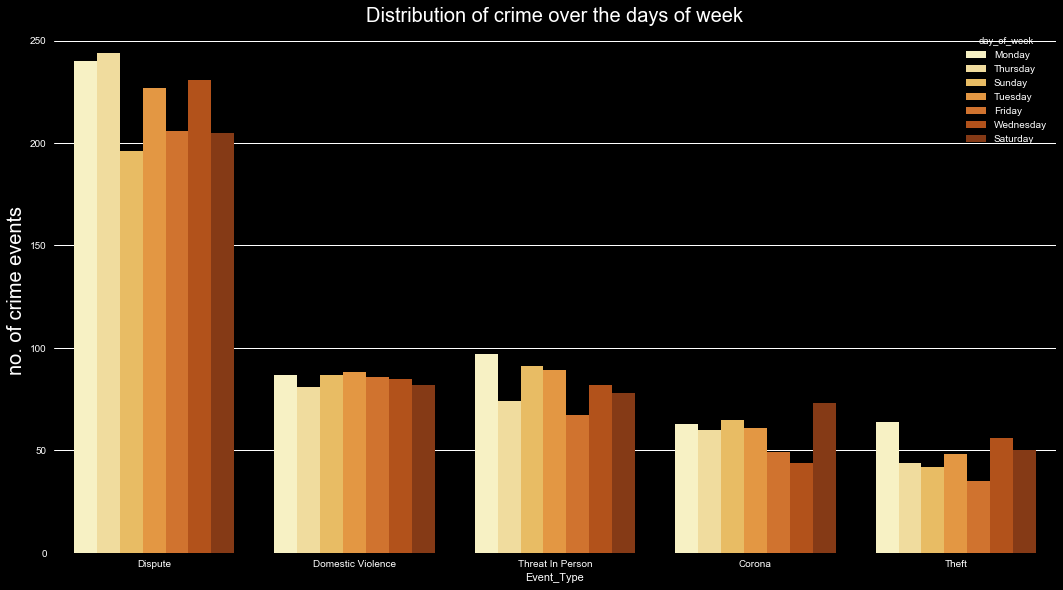

In [99]:
sns.set()
plt.style.use('dark_background')
plt.figure(figsize=(16,9))
sns.countplot( x='Event_Type',hue='day_of_week', data=df , palette = "YlOrBr",
              order=df.Event_Type.value_counts().iloc[:5].index) 
 
              

plt.title('Distribution of crime over the days of week', fontsize = 20)
plt.ylabel("no. of crime events",fontsize = 20)

In [95]:
df

,District,Event,Circle,Police_Station,Caller_Source,Event_Type,Event_Sub-Type,Create Date/Time,Latitude,Longitude,Time,Dates,just_date,day_of_week,time_hour,Day/Night
0,LUCKNOW,P01042100004,C1,PS1,PHONE,Information Against Police,Misbehavior By Prv,01/04/2021 00:00:00,26.834,81.008,00:00:00,2021-01-04 00:00:00,2021-01-04,Monday,0,Night
1,LUCKNOW,P01042104316,C1,PS1,PHONE,Threat In Person,Attack,01/04/2021 12:09:00,26.828,81.014,12:09:00,2021-01-04 12:09:00,2021-01-04,Monday,12,Day
2,LUCKNOW,P01042104847,C1,PS1,PHONE,Dispute,Dispute In Hospital,01/04/2021 12:51:00,26.840,81.009,12:51:00,2021-01-04 12:51:00,2021-01-04,Monday,12,Day
3,LUCKNOW,P01042105074,C1,PS1,PHONE,Gambling,Play Cards,01/04/2021 13:10:00,26.828,81.002,13:10:00,2021-01-04 13:10:00,2021-01-04,Monday,13,Day
4,LUCKNOW,P01042105152,C1,PS1,PHONE,Threat In Person,Attack,01/04/2021 13:18:00,26.834,81.033,13:18:00,2021-01-04 13:18:00,2021-01-04,Monday,13,Day
5,LUCKNOW,P01042105910,C1,PS1,PHONE,Missing,Grp- Person Accident By Train,01/04/2021 14:19:00,26.826,81.011,14:19:00,2021-01-04 14:19:00,2021-01-04,Monday,14,Day
6,LUCKNOW,P01042106298,C1,PS1,PHONE,Information Against Police,Misbehavior By Ps Incharge,01/04/2021 14:51:00,26.835,81.008,14:51:00,2021-01-04 14:51:00,2021-01-04,Monday,14,Day
7,LUCKNOW,P01042106686,C1,PS1,PHONE,Theft,Gold Shop,01/04/2021 15:25:00,26.839,81.026,15:25:00,2021-01-04 15:25:00,2021-01-04,Monday,15,Day
8,LUCKNOW,P01042109479,C1,PS1,PHONE,Dispute,Dispute With Drunk Person,01/04/2021 19:45:00,26.835,81.026,19:45:00,2021-01-04 19:45:00,2021-01-04,Monday,19,Night
9,LUCKNOW,P01042110068,C1,PS1,PHONE,Dispute,Money Transactions Dispute,01/04/2021 20:31:00,26.841,81.015,20:31:00,2021-01-04 20:31:00,2021-01-04,Monday,20,Night


In [37]:
from geopy  import Nominatim
import geocoder

In [1]:
!pip install geocoder

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [16]:
df['Latitude'][df.Event_Type=='Dispute'].nunique()

106

In [17]:
df['Latitude'][df.Event_Type=='Dispute'].value_counts()

26.852    55
26.868    52
26.854    46
26.873    43
26.851    41
26.876    41
26.863    41
26.866    39
26.874    39
26.853    36
26.850    34
26.849    33
26.839    32
26.875    32
26.877    32
26.867    30
26.846    29
26.859    28
26.893    27
26.857    27
26.844    27
26.883    26
26.865    26
26.860    25
26.864    22
26.885    21
26.861    21
26.858    21
26.869    21
26.835    20
          ..
26.914     3
26.924     3
26.910     3
26.831     3
26.824     2
26.829     2
26.904     2
26.828     2
26.897     2
26.916     2
26.900     2
26.925     2
26.821     2
26.920     2
26.917     2
26.921     1
26.683     1
26.909     1
26.818     1
26.906     1
25.777     1
26.929     1
26.915     1
26.911     1
26.927     1
26.902     1
26.901     1
26.918     1
26.770     1
26.919     1
Name: Latitude, Length: 106, dtype: int64

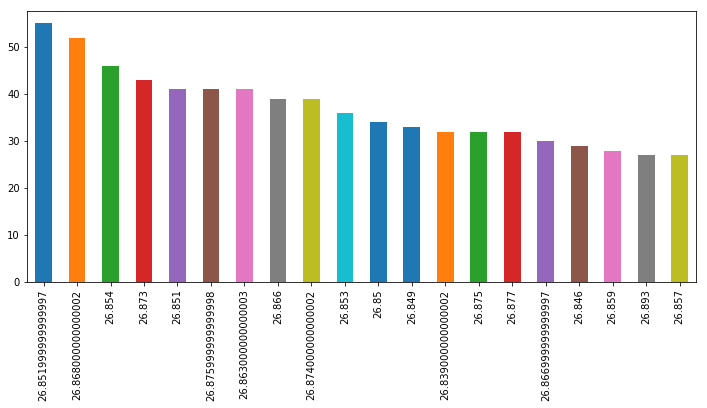

In [25]:
df['Latitude'][df.Event_Type=='Dispute'].value_counts().iloc[:20].plot.bar(figsize=(12, 5))

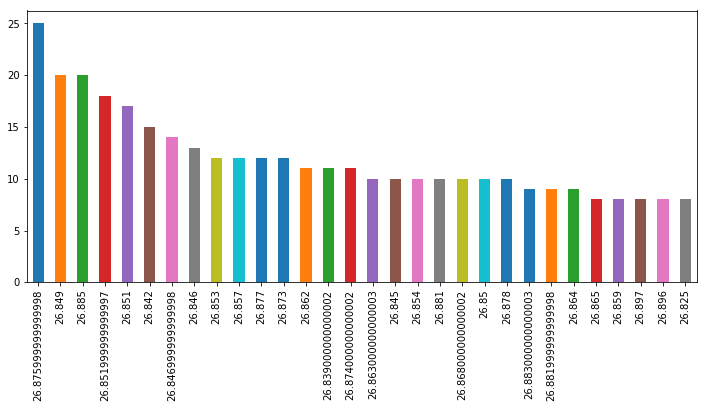

In [29]:
df['Latitude'][df.Event_Type=='Domestic Violence'].value_counts().iloc[:30].plot.bar(figsize=(12, 5))

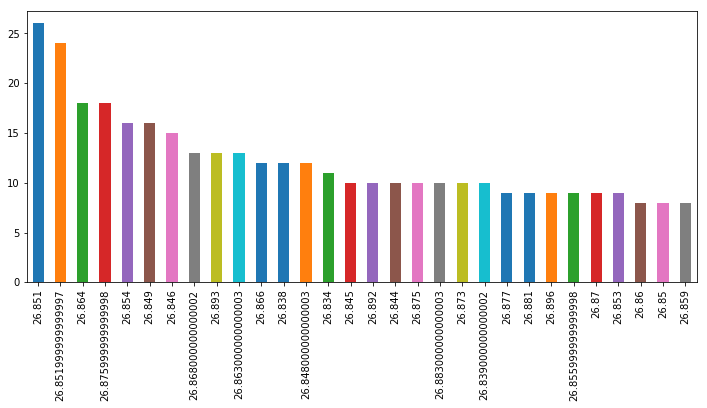

In [30]:
df['Latitude'][df.Event_Type=='Threat In Person'].value_counts().iloc[:30].plot.bar(figsize=(12, 5))

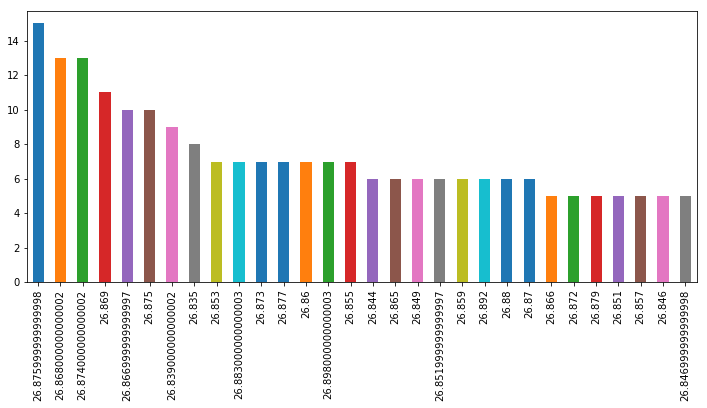

In [31]:
df['Latitude'][df.Event_Type=='Theft'].value_counts().iloc[:30].plot.bar(figsize=(12, 5))

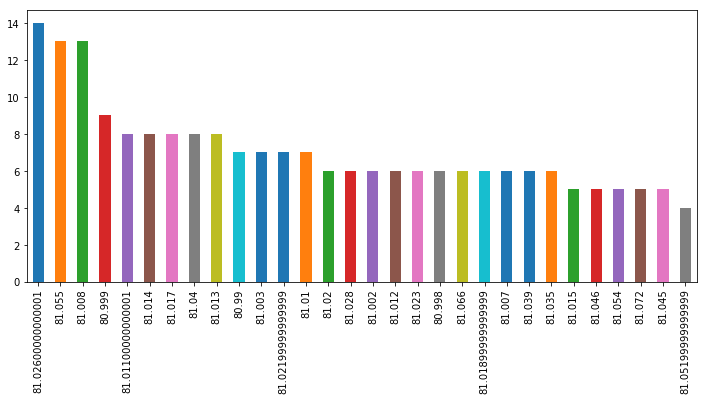

In [33]:
df['Longitude'][df.Event_Type=='Theft'].value_counts().iloc[:30].plot.bar(figsize=(12, 5))

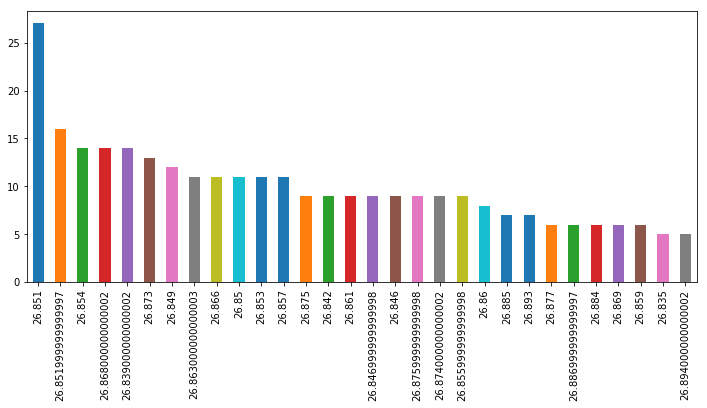

In [32]:
df['Latitude'][df.Event_Type=='Corona'].value_counts().iloc[:30].plot.bar(figsize=(12, 5))

Text(0,0.5,'no. of crime events')

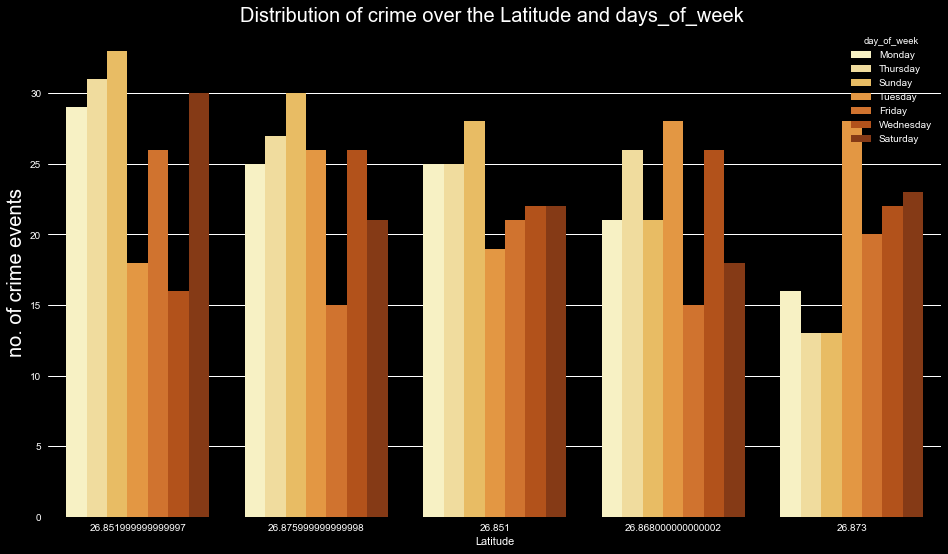

In [32]:
sns.set()
plt.style.use('dark_background')
plt.figure(figsize=(16,9))
sns.countplot( x='Latitude', hue='day_of_week', data=df , palette = "YlOrBr",
              order=df.Latitude.value_counts().iloc[:5].index) 
 
              

plt.title('Distribution of crime in days_of_week ', fontsize = 20)
plt.ylabel("no. of crime events",fontsize = 20)

Text(0,0.5,'hours')

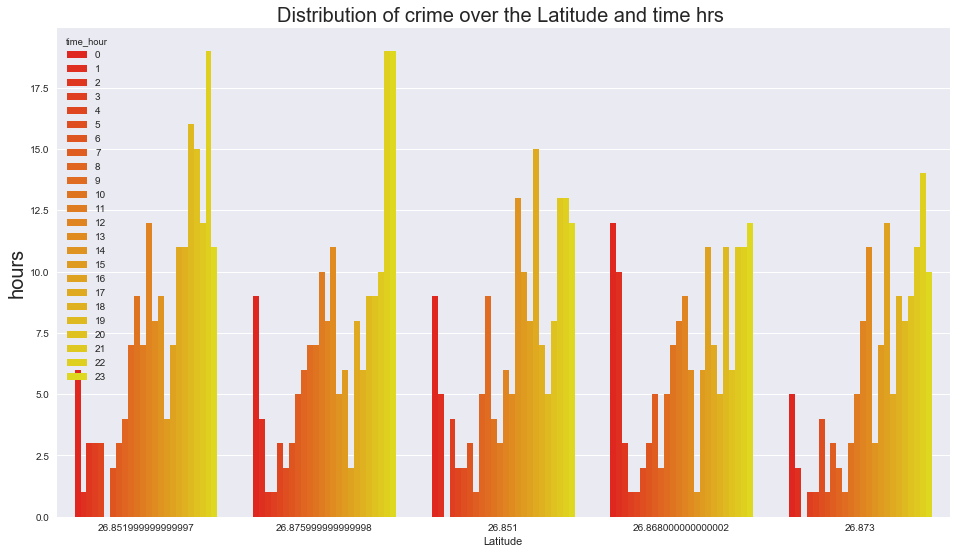

In [32]:
sns.set()

plt.figure(figsize=(16,9))
sns.countplot( x='Latitude',hue='time_hour', data=df ,
              order=df.Latitude.value_counts().iloc[:5].index,palette = 'autumn',) 
 
              

plt.title('Distribution of crime over the Latitude and time hrs ', fontsize = 20)
plt.ylabel("hours",fontsize = 20)

In [29]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


Text(0.5,0,'Latitude')

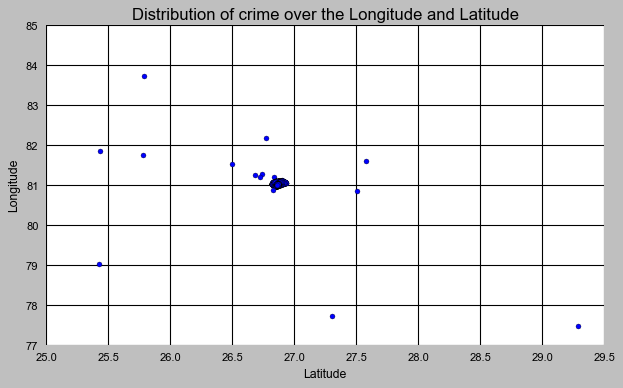

In [48]:
sns.set()
plt.style.use('grayscale')
plt.figure(figsize=(9,5))
plt.scatter(data=df, x='Latitude', y='Longitude')       

plt.title('Distribution of crime over the Longitude and Latitude' , fontsize = 15)
plt.ylabel("Longitude")
plt.xlabel("Latitude")